# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from api_keys import api_key
url = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=' + api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

#store data from API calls
weather_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [4]:

#Start api calls
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 1 # counter to count the number of call sets
index = 0
#Get current time
t0 =time.time()

print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        weather_df.set_value(index, "City", city_stats["name"])
        weather_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        weather_df.set_value(index, "Country", city_stats("sys.country"))
        weather_df.set_value(index, "Date", city_stats("dt"))
        weather_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        weather_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        weather_df.set_value(index, "Lat", city_stats("coord.lat"))
        weather_df.set_value(index, "Lng", city_stats("coord.lon"))
        weather_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | ushuaia
name 'owm' is not defined
Processing Record 2 of Set 1 | hasaki
name 'owm' is not defined
Processing Record 3 of Set 1 | thompson
name 'owm' is not defined
Processing Record 4 of Set 1 | busselton
name 'owm' is not defined
Processing Record 5 of Set 1 | alofi
name 'owm' is not defined
Processing Record 6 of Set 1 | mataura
name 'owm' is not defined
Processing Record 7 of Set 1 | bluff
name 'owm' is not defined
Processing Record 8 of Set 1 | olafsvik
name 'owm' is not defined
Processing Record 9 of Set 1 | epinal
name 'owm' is not defined
Processing Record 10 of Set 1 | hermanus
name 'owm' is not defined
Processing Record 11 of Set 1 | mangrol
name 'owm' is not defined
Processing Record 12 of Set 1 | barentsburg
name 'owm' is not defined
Processing Record 13 of Set 1 | morgan city
name 'owm' is not defined
Processing Record 14 of Set 1 | rolim de moura
name 'owm' is not defined
Processing Record 1

Processing Record 1 of Set 4 | lompoc
name 'owm' is not defined
Processing Record 2 of Set 4 | chau doc
name 'owm' is not defined
Processing Record 3 of Set 4 | vila velha
name 'owm' is not defined
Processing Record 4 of Set 4 | bukama
name 'owm' is not defined
Processing Record 5 of Set 4 | hirara
name 'owm' is not defined
Processing Record 6 of Set 4 | sumbawa
name 'owm' is not defined
Processing Record 7 of Set 4 | kattivakkam
name 'owm' is not defined
Processing Record 8 of Set 4 | beisfjord
name 'owm' is not defined
Processing Record 9 of Set 4 | tutoia
name 'owm' is not defined
Processing Record 10 of Set 4 | iquitos
name 'owm' is not defined
Processing Record 11 of Set 4 | san policarpo
name 'owm' is not defined
Processing Record 12 of Set 4 | jardim
name 'owm' is not defined
Processing Record 13 of Set 4 | vardo
name 'owm' is not defined
Processing Record 14 of Set 4 | baruun-urt
name 'owm' is not defined
Processing Record 15 of Set 4 | luderitz
name 'owm' is not defined
Proces

Processing Record 1 of Set 7 | aliaga
name 'owm' is not defined
Processing Record 2 of Set 7 | bairiki
name 'owm' is not defined
Processing Record 3 of Set 7 | pontes e lacerda
name 'owm' is not defined
Processing Record 4 of Set 7 | tiksi
name 'owm' is not defined
Processing Record 5 of Set 7 | jumla
name 'owm' is not defined
Processing Record 6 of Set 7 | denpasar
name 'owm' is not defined
Processing Record 7 of Set 7 | san quintin
name 'owm' is not defined
Processing Record 8 of Set 7 | tautira
name 'owm' is not defined
Processing Record 9 of Set 7 | khotkovo
name 'owm' is not defined
Processing Record 10 of Set 7 | lumberton
name 'owm' is not defined
Processing Record 11 of Set 7 | larsnes
name 'owm' is not defined
Processing Record 12 of Set 7 | naifaru
name 'owm' is not defined
Processing Record 13 of Set 7 | margate
name 'owm' is not defined
Processing Record 14 of Set 7 | padron
name 'owm' is not defined
Processing Record 15 of Set 7 | port keats
name 'owm' is not defined
Proce

Processing Record 1 of Set 10 | mana
name 'owm' is not defined
Processing Record 2 of Set 10 | pangody
name 'owm' is not defined
Processing Record 3 of Set 10 | ulladulla
name 'owm' is not defined
Processing Record 4 of Set 10 | chagda
name 'owm' is not defined
Processing Record 5 of Set 10 | ponta delgada
name 'owm' is not defined
Processing Record 6 of Set 10 | luocheng
name 'owm' is not defined
Processing Record 7 of Set 10 | kangaatsiaq
name 'owm' is not defined
Processing Record 8 of Set 10 | yerbogachen
name 'owm' is not defined
Processing Record 9 of Set 10 | sapao
name 'owm' is not defined
Processing Record 10 of Set 10 | pacific grove
name 'owm' is not defined
Processing Record 11 of Set 10 | zomin
name 'owm' is not defined
Processing Record 12 of Set 10 | ilorin
name 'owm' is not defined
Processing Record 13 of Set 10 | trelew
name 'owm' is not defined
Processing Record 14 of Set 10 | ust-kan
name 'owm' is not defined
Processing Record 15 of Set 10 | rondonopolis
name 'owm' i

Processing Record 1 of Set 13 | santiago del estero
name 'owm' is not defined
Processing Record 2 of Set 13 | ngaoundere
name 'owm' is not defined
Processing Record 3 of Set 13 | northam
name 'owm' is not defined
Processing Record 4 of Set 13 | bilibino
name 'owm' is not defined
Processing Record 5 of Set 13 | kulhudhuffushi
name 'owm' is not defined
Processing Record 6 of Set 13 | torbay
name 'owm' is not defined
Processing Record 7 of Set 13 | kidal
name 'owm' is not defined
Processing Record 8 of Set 13 | gunnedah
name 'owm' is not defined
Processing Record 9 of Set 13 | tabas
name 'owm' is not defined
Processing Record 10 of Set 13 | zhengjiatun
name 'owm' is not defined
Processing Record 11 of Set 13 | puerto escondido
name 'owm' is not defined
Processing Record 12 of Set 13 | radyvyliv
name 'owm' is not defined
Processing Record 13 of Set 13 | alto vera
name 'owm' is not defined
Processing Record 14 of Set 13 | borovoy
name 'owm' is not defined
Processing Record 15 of Set 13 | qu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.count()

City          0
Cloudiness    0
Country       0
Date          0
Max Temp      0
Wind Speed    0
Lat           0
Lng           0
Humidity      0
dtype: int64

In [7]:
weather_df.to_csv("weather_df.csv")
weather_df.head(5)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

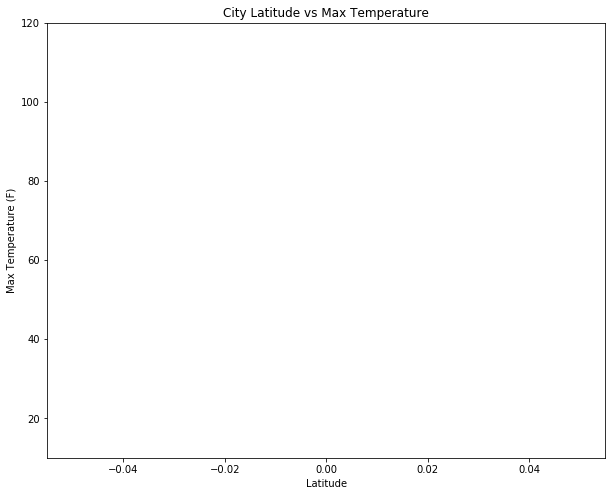

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(10,120)
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("Lat Vs Temp.png")

#### Latitude vs. Humidity Plot

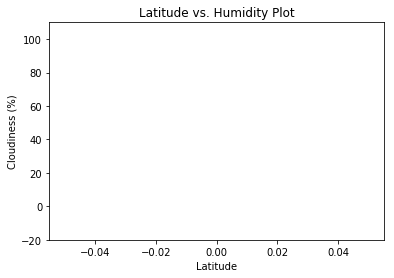

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color="b", alpha = .5)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-20,110)
plt.savefig("Latitude vs. Humidity Plot.png")

#### Latitude vs. Cloudiness Plot

(-20, 120)

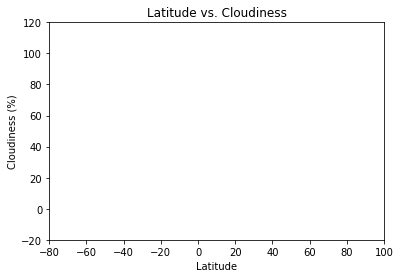

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color="g", alpha=.5)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

#### Latitude vs. Wind Speed Plot

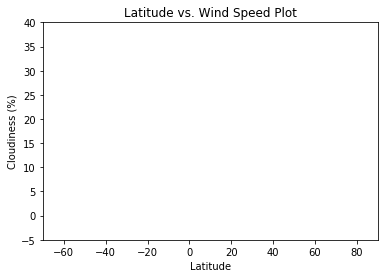

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], color="y", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-70,90)
plt.ylim(-5,40)
plt.title("Latitude vs. Wind Speed Plot")
plt.savefig("Latitude vs. Wind Speed Plot.png")